# Perceptrons

**Name**: Maria Gabriela Ayala

In [1]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

## Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

### Part 1 
Complete the `perceptron_train` function and report the results.  
[Note: for this part you should **not** randomly shuffle the order of the data]

In [2]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

In [3]:
def perceptron_train(data, weights, bias):
    """
    apply transformation and update weights and bias
    :type X: array
    :type y: int
    :type weights: array
    :type bias : int
    :rtype: weights, bias, number of mistakes
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        a = np.dot(weights, X) + bias
        if a * y <= 0:
            mistakes_count += 1
            weights = weights + np.multiply(y, X)
            bias = bias + y
            
    return weights, bias, mistakes_count

#### Part 1 A
Report the weights, bias, and number of mistakes after the first epoch.

In [4]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: 0, mistakes: 5


In [5]:
# for grading - ignore

#### Part 1 B:
Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [6]:
epochs = 50

for i in range(epochs):
    weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [1.  0.5 0.5], bias: -1, mistakes: 4


### Part 2
Is it possible that your Perceptron classifier would 
ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
Clearly explain your reasoning.

No, it is not possible for the Perceptron classifier to perfectly classify all training examples after more passes of the Percepton algorithm because for each pass through the training data (epoch), we are not reshuffling the data points. Essentially, we are passing the data in the exact same order each iteration. This means that as we increase the number of epochs, the learned w and b that have improved from the starting point to the end point are not able to learn more because we are exposing them to the exact same data points in the exact same order, so the learning process is stuck and it cannot ever perfectly classify all training examples, no matter how many epochs are increased.

### Part 3
Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

No, if the the data is presented in any other randomized order, then the Perceptron algorithm does not necessarily make the same number of mistakes after the first epoch. This is because the algorithm adjusts for mistakes, getting closer to the directionality of the true label. In essence, when we give the algorithm inputs in a randomized order, the starting point and each subsequent point is presented in a different order, so the adjustment and the number of mistakes to the true label will vary depending on this order. This is because the Perceptron algorithm is error centric and it evaluates one example at a time. For example, if first examples are in a more negative direction (farther away) than the true label, then it will take more mistakes to learn the right weights and bias than if the first points are closer to the true label.

###  Part 4:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

In [8]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """

        for i in range(max_epochs):
            self.epoch_mistakes = 0 
            idx = list(range(self.n))
            np.random.shuffle(idx)
            for i in idx:
                X = self.X_train[i]
                y = self.y_train[i]
                a = np.dot(self.w, X) + self.b
                if a * y <= 0:
                    self.epoch_mistakes += 1
                    self.num_mistakes += 1
                    self.w = self.w + np.multiply(y, X)
                    self.b = self.b + y
            if self.epoch_mistakes == 0:
                break
             

    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        if decision_boundary:
            xplot = np.linspace(-1, 1)
            yplot = (-self.b -self.w[0] * xplot/ self.w[1])
            ax.plot(xplot, yplot, lw=3, color="black")
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

#### Part 4 A
The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

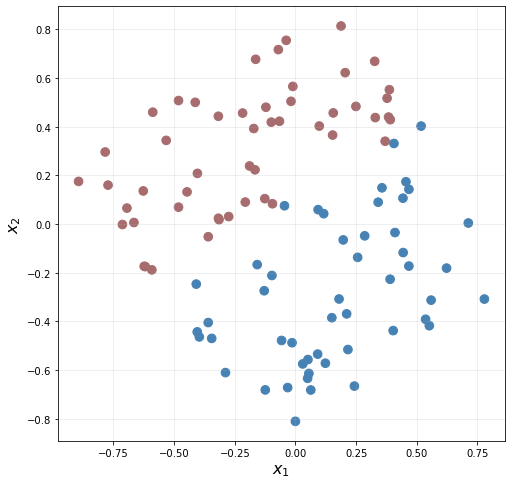

In [9]:
margin = 0.2 # subject to experiment
perc = Perceptron(n=100, margin=0.01)
perc.plot_model(decision_boundary=False)

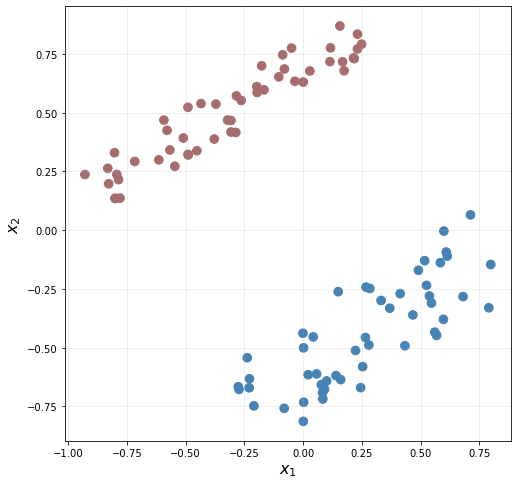

In [10]:
margin = 0.2 # subject to experiment
perc = Perceptron(n=100, margin=0.4)
perc.plot_model(decision_boundary=False)

The margin parameter affects how separable the data features are from one another. The higher the margin, the more separable x1 and x2 are whereas the smaller the margin, the less clearly separable x1 and x2 are because the data points are more spread out and the space between them is not very visible. 

#### Part 4 B
Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch. (**Note:** np.random.shuffle() will be helpful here)
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process. (**Note:** You should also have a seperate counter variable for keeping track of mistakes within each epoch.)


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [11]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... ok
TestPosMistake (tests.tests.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


#### Part 4 C 
Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


The equation for the learned decision boundary is the following:
$$w_1x_1 + w_2x_2 + b = 0 $$
$$ x_2 = \frac {-b -w_1x_1}{w_2}$$

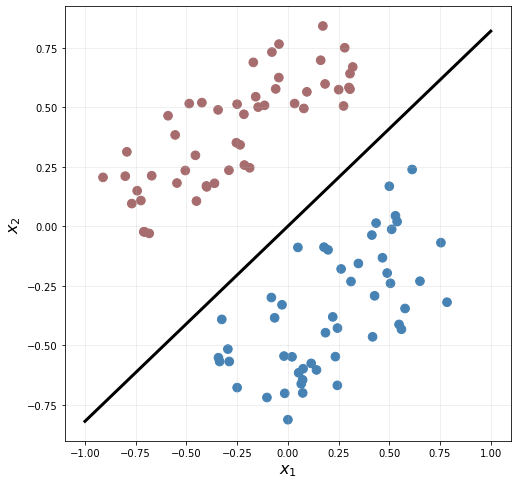

In [12]:
perc = Perceptron(n=100, margin=0.2)
perc.train()
perc.plot_model(decision_boundary=True)

### Part 5

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/M^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do once.

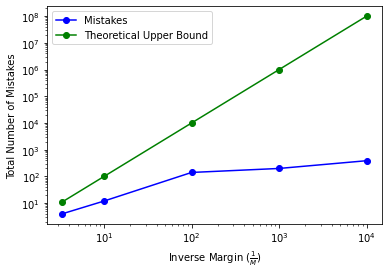

In [16]:
margins = [0.3, 0.1, 0.01, 0.001, 0.0001]
inverse_margins = []
mistakes = []
upper_bounds = []


for m in margins:
    perc = Perceptron(n=100, margin = m)
    perc.train()
    inv_margin = 1/m
    inverse_margins.append(inv_margin)
    ub = 1/(m ** 2)
    upper_bounds.append(ub)
    mistakes.append(perc.num_mistakes)


plt.plot(inverse_margins, mistakes, label = "Mistakes", marker='o', color= "blue")
plt.plot(inverse_margins, upper_bounds, label = "Theoretical Upper Bound", marker='o', color= "green")
plt.xlabel(r'Inverse Margin $(\frac{1}{M})$')
plt.ylabel('Total Number of Mistakes')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

As we can observe from the graph, as we increase the size of the margin, it takes fewer mistakes for the Perceptron algorithm to converge and in every case, this happens before the theoretical upper bound (the blue line is always below the green line at every point).